<a href="https://colab.research.google.com/github/ariG23498/RNN_Viz/blob/master/RNN_Keras_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports
The imports here are:
1. tensorflow
2. numpy
3. os
4. time

In [43]:
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf

import numpy as np
import os
import time

In [2]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt',
                                       'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

1122304/1115394 [==============================] - 0s 0us/step
Length of text: 1115394 characters


In [3]:
# Take a look at the first 250 characters in text
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [4]:
# The unique characters in the file
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))

65 unique characters


In [5]:
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

In [6]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

F
i
r
s
t


In [7]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [8]:
def split_input_target(chunk):
  input_text = chunk[:-1]
  target_text = chunk[1:]
  return input_text, target_text

dataset = sequences.map(split_input_target)

for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target data: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [9]:
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

In [10]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [11]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [12]:
model = build_model(
    vocab_size = len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           16640     
_________________________________________________________________
lstm (LSTM)                  (64, None, 1024)          5246976   
_________________________________________________________________
dense (Dense)                (64, None, 65)            66625     
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


In [14]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)

In [15]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [16]:
EPOCHS=20
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20
172/172 [==============================] - 9s 55ms/step - loss: 2.5854
Epoch 2/20
172/172 [==============================] - 9s 55ms/step - loss: 1.8699
Epoch 3/20
172/172 [==============================] - 9s 55ms/step - loss: 1.6258
Epoch 4/20
172/172 [==============================] - 9s 55ms/step - loss: 1.4972
Epoch 5/20
172/172 [==============================] - 9s 55ms/step - loss: 1.4188
Epoch 6/20
172/172 [==============================] - 9s 55ms/step - loss: 1.3632
Epoch 7/20
172/172 [==============================] - 9s 55ms/step - loss: 1.3203
Epoch 8/20
172/172 [==============================] - 9s 55ms/step - loss: 1.2818
Epoch 9/20
172/172 [==============================] - 9s 55ms/step - loss: 1.2470
Epoch 10/20
172/172 [==============================] - 9s 55ms/step - loss: 1.2125
Epoch 11/20
172/172 [==============================] - 9s 55ms/step - loss: 1.1797
Epoch 12/20
172/172 [==============================] - 9s 55ms/step - loss: 1.1435
Epoch 13/20
1

In [21]:
tf.train.latest_checkpoint(checkpoint_dir)

model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (1, None, 256)            16640     
_________________________________________________________________
lstm_3 (LSTM)                (1, None, 1024)           5246976   
_________________________________________________________________
dense_3 (Dense)              (1, None, 65)             66625     
Total params: 5,330,241
Trainable params: 5,330,241
Non-trainable params: 0
_________________________________________________________________


In [23]:
model = model

intermediate_layer_model = tf.keras.models.Model(inputs=model.get_layer('embedding_3').input,
                                 outputs=model.get_layer('lstm_3').output)
intermediate_layer_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3_input (InputLaye [(1, None)]               0         
_________________________________________________________________
embedding_3 (Embedding)      (1, None, 256)            16640     
_________________________________________________________________
lstm_3 (LSTM)                (1, None, 1024)           5246976   
Total params: 5,263,616
Trainable params: 5,263,616
Non-trainable params: 0
_________________________________________________________________


In [52]:
def generate_text(model, start_string, hidden_index):
  # Catch the hidden state
  h_list = []

  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 200

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
    predictions = model(input_eval)
    h = tf.squeeze(intermediate_layer_model(input_eval))
    h_list.append(h[hidden_index].numpy())
    # remove the batch dimension
    predictions = tf.squeeze(predictions, 0)

    # using a categorical distribution to predict the character returned by the model
    predictions = predictions / temperature
    predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

    # We pass the predicted character as the next input to the model
    # along with the previous hidden state
    input_eval = tf.expand_dims([predicted_id], 0)

    text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated)), h_list

In [47]:
from colorsys import hsv_to_rgb

def pseudocolor(val, minval, maxval):
  """ Convert val in range minval..maxval to the range 0..120 degrees which
      correspond to the colors Red and Green in the HSV colorspace.
  """
  h = (float(val-minval) / (maxval-minval)) * 120

  # Convert hsv color (h,1,1) to its rgb equivalent.
  # Note: hsv_to_rgb() function expects h to be in the range 0..1 not 0..360

  h = 120-h
  r, g, b = hsv_to_rgb(h/360, 1., 1.)
  return (r, g, b)

In [41]:
def draw_text(text, heat_map):
  fig, ax = plt.subplots()

  # text = '''Hey there, I am Aritra Roy Gosthipaty.
  # Nice to meet you'''
  # lol = np.random.rand(len(text))
  counter_x = 0.0
  counter_y = 1.0
  for ch, heat in zip(text,heat_map):
    if counter_x > 1 and 0 <= counter_y <= 1:
      counter_x = 0.0
      counter_y -= 0.1
    if ch == '\n':
      counter_x = 0.0
      counter_y -= 0.1
      continue
    ax.text(x = 0.+counter_x,
            y = 1.+counter_y,
            s = ch,
            color = 'black',
            fontweight = 'bold',
            fontsize=10,
            backgroundcolor = pseudocolor(heat, -1, 1)
            )
    counter_x += 0.05
  ax.axis('off')
  plt.show()

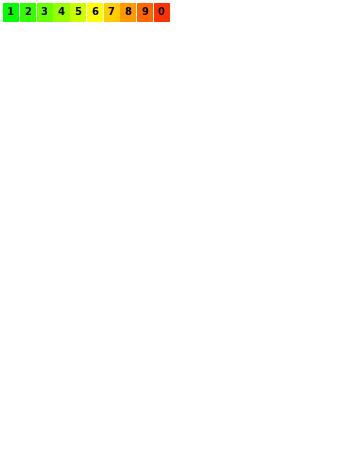

In [49]:
gen_text, h_list = '1234567890' ,[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8]
draw_text(gen_text, h_list)

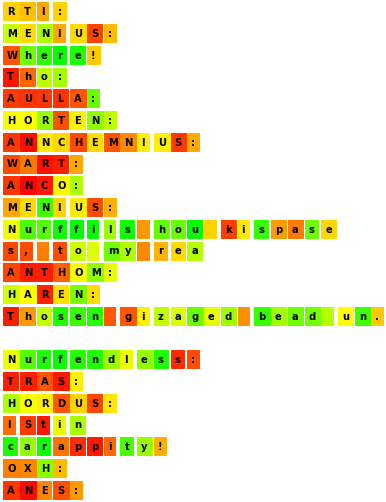

In [53]:
gen_text, h_list = generate_text(model, start_string=u"R", hidden_index=10)
draw_text(gen_text, h_list)

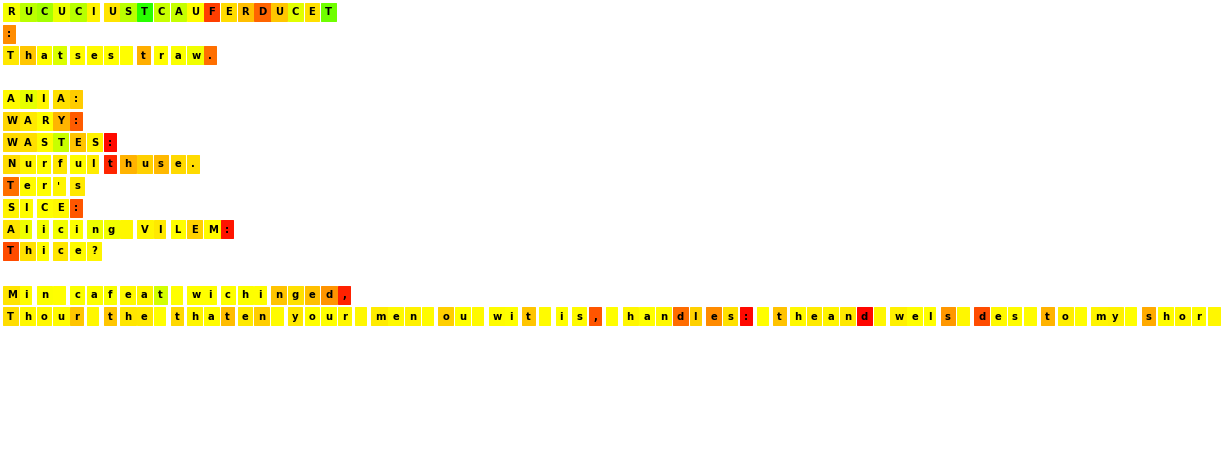

In [54]:
gen_text, h_list = generate_text(model, start_string=u"R", hidden_index=100)
draw_text(gen_text, h_list)

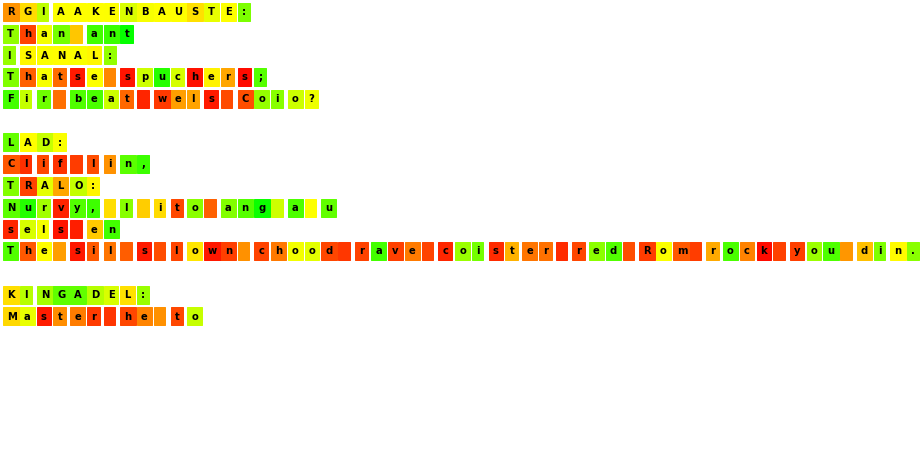

In [55]:
gen_text, h_list = generate_text(model, start_string=u"R", hidden_index=200)
draw_text(gen_text, h_list)

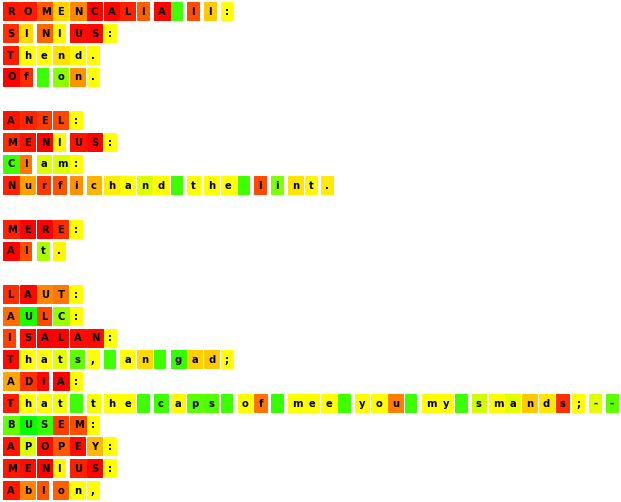

In [56]:
gen_text, h_list = generate_text(model, start_string=u"R", hidden_index=300)
draw_text(gen_text, h_list)

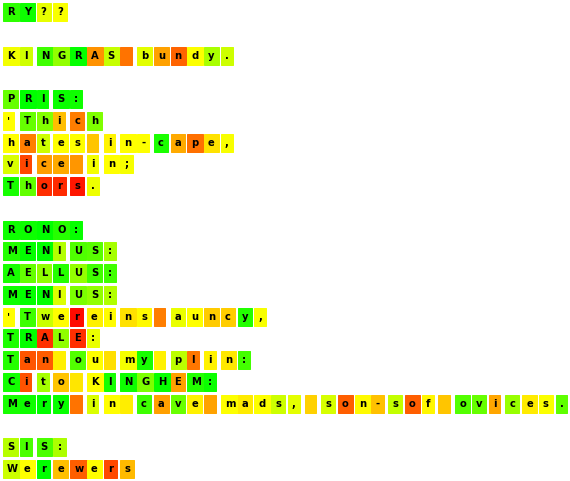

In [57]:
gen_text, h_list = generate_text(model, start_string=u"R", hidden_index=500)
draw_text(gen_text, h_list)

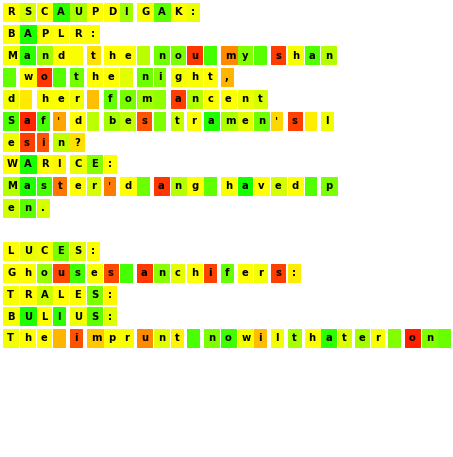

In [58]:
gen_text, h_list = generate_text(model, start_string=u"R", hidden_index=700)
draw_text(gen_text, h_list)

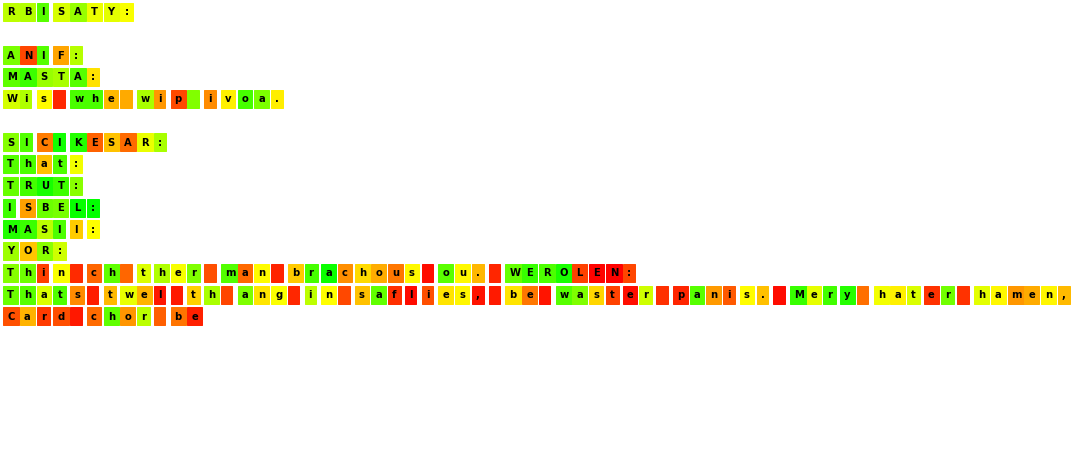

In [59]:
gen_text, h_list = generate_text(model, start_string=u"R", hidden_index=1000)
draw_text(gen_text, h_list)